In [2]:
import pandas as pd
from sqlalchemy import create_engine
import  psycopg2 

In [3]:
# Create a connection string
db_username = 'postgres'
db_password = 'Mendida14'
db_host = 'localhost'
db_port = '5432'
db_name = 'telecom'

connection_string = f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}'

# Create a database engine
engine = create_engine(connection_string)

In [4]:
# Write a query
query = 'SELECT * FROM xdr_data'

# Load data into a DataFrame
df = pd.read_sql(query, engine)

# Set the option to display all columns
pd.set_option('display.max_columns', None)



In [5]:
# Display the first few rows
print(df[['Dur. (ms).1', 'Dur. (ms)']].tail().to_string())

        Dur. (ms).1  Dur. (ms)
149996   81230763.0    81230.0
149997   97970704.0    97970.0
149998   98249527.0    98249.0
149999   97910631.0    97910.0
150000          NaN        NaN


In [6]:

# Rename specific columns
df.rename(columns={'Dur. (ms)': 'Dur. (s)', 'Dur. (ms).1': 'Dur. (ms)'}, inplace=True)


In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [39]:
df['MSISDN/Number'].unique().size

106857

In [46]:
df['MSISDN/Number'].head()

0    3.366496e+10
1    3.368185e+10
2    3.376063e+10
3    3.375034e+10
4    3.369980e+10
Name: MSISDN/Number, dtype: float64

In [60]:
df.shape

(150001, 55)

In [61]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (s)                                    float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [8]:
df= pd.read_csv('../data/raw/xdr_data.csv')
df.shape

(150001, 55)

## EDA

- missing values
- outliers 
- quantitative methods 

In [43]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
print(features_with_na )

['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']


In [62]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (s)                                    float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [63]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (s)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms)', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
   

In [8]:
# Count unique values for each column
unique_counts = df.nunique()

# Display the unique counts
print(unique_counts)

Bearer Id                                   134708
Start                                         9997
Start ms                                      1000
End                                           6403
End ms                                        1000
Dur. (s)                                     89525
IMSI                                        107265
MSISDN/Number                               106856
IMEI                                        107270
Last Location Name                           45547
Avg RTT DL (ms)                               2130
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41753
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54399
TCP UL Retrans. Vol (Bytes)                  35120
DL TP < 50 Kbps (%)                            100
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

In [12]:
df.size

8250055

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (s)                                  150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [65]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+0

In [66]:
df.describe(include=['number'])

,Bearer Id,Start ms,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+0

In [14]:
df.describe(include=['object'])

,Start,End,Last Location Name,Handset Manufacturer,Handset Type
count,150000,150000,148848,149429,149429
unique,9997,6403,45547,170,1396
top,4/26/2019 7:25,4/25/2019 0:01,D41377B,Apple,Huawei B528S-23A
freq,203,1150,80,59565,19752


### Handsets and Handset manufacturers 

In [45]:
# Exclude "undefined" from the DataFrame
filtered_df = df[df['Handset Type'] != 'undefined']
# Count occurrences of each handset
handset_counts = filtered_df['Handset Type'].value_counts()

# Get the top 10 handsets
top_10_handsets = handset_counts.head(10)

# Display the results
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: count, dtype: int64


In [23]:

# Count occurrences of each handset
handset_manuf_counts = df['Handset Manufacturer'].value_counts()

# Get the top 10 handsets
top_3_manufacturer = handset_manuf_counts.head(3)

# Display the results
print(top_3_manufacturer)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [28]:
# Count occurrences of each handset by manufacturer
handset_counts = df.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='Count')

# Identify the top 3 manufacturers based on total handset counts
top_manufacturers = handset_counts.groupby('Handset Manufacturer')['Count'].sum().nlargest(3).index

# Filter for the top manufacturers and get the top 5 handsets per manufacturer
top_handsets_per_manufacturer = (
    handset_counts[handset_counts['Handset Manufacturer'].isin(top_manufacturers)]
    .groupby('Handset Manufacturer', as_index=False)  # Ensure grouping column is included
    .apply(lambda x: x.nlargest(5, 'Count'))
    .reset_index(drop=True)
)



# Display the results
print(top_handsets_per_manufacturer.sort_values('Handset Manufacturer'))

   Handset Manufacturer                    Handset Type  Count
0                 Apple         Apple iPhone 6S (A1688)   9419
1                 Apple          Apple iPhone 6 (A1586)   9023
2                 Apple          Apple iPhone 7 (A1778)   6326
3                 Apple         Apple iPhone Se (A1723)   5187
4                 Apple          Apple iPhone 8 (A1905)   4993
5                Huawei                Huawei B528S-23A  19752
6                Huawei                    Huawei E5180   2079
7                Huawei  Huawei P20 Lite Huawei Nova 3E   2021
8                Huawei                      Huawei P20   1480
9                Huawei                  Huawei Y6 2018    997
10              Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
11              Samsung      Samsung Galaxy A5 Sm-A520F   3724
12              Samsung     Samsung Galaxy J5 (Sm-J530)   3696
13              Samsung     Samsung Galaxy J3 (Sm-J330)   3484
14              Samsung    Samsung Galaxy S7 (Sm-G930X)

C:\Users\Yoseph\AppData\Local\Temp\ipykernel_23908\1376946126.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Count'))


### Data aggregation 

In [31]:
# Assume df is your DataFrame with the provided columns

# Aggregate data per user
aggregated_data = df.groupby('MSISDN/Number').agg(
    number_of_sessions=('Bearer Id', 'nunique'),
    total_session_duration_sec=('Dur. (s)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum'),
    social_media_volume=('Social Media DL (Bytes)', 'sum'),
    google_volume=('Google DL (Bytes)', 'sum'),
    email_volume=('Email DL (Bytes)', 'sum'),
    youtube_volume=('Youtube DL (Bytes)', 'sum'),
    netflix_volume=('Netflix DL (Bytes)', 'sum'),
    gaming_volume=('Gaming DL (Bytes)', 'sum'),
    other_volume=('Other DL (Bytes)', 'sum')
).reset_index()

# Sum upload and download for each application
aggregated_data['social_media_volume'] += df.groupby('MSISDN/Number')['Social Media UL (Bytes)'].sum().values
aggregated_data['google_volume'] += df.groupby('MSISDN/Number')['Google UL (Bytes)'].sum().values
aggregated_data['email_volume'] += df.groupby('MSISDN/Number')['Email UL (Bytes)'].sum().values
aggregated_data['youtube_volume'] += df.groupby('MSISDN/Number')['Youtube UL (Bytes)'].sum().values
aggregated_data['netflix_volume'] += df.groupby('MSISDN/Number')['Netflix UL (Bytes)'].sum().values
aggregated_data['gaming_volume'] += df.groupby('MSISDN/Number')['Gaming UL (Bytes)'].sum().values
aggregated_data['other_volume'] += df.groupby('MSISDN/Number')['Other UL (Bytes)'].sum().values

# Calculate total data volume
aggregated_data['total_data_volume'] = aggregated_data['total_download'] + aggregated_data['total_upload']

# Display the aggregated data
print(aggregated_data.shape)
print(aggregated_data.head())

(106856, 13)
   MSISDN/Number  number_of_sessions  total_session_duration_sec  \
0   3.360100e+10                   1                    116720.0   
1   3.360100e+10                   1                    181230.0   
2   3.360100e+10                   1                    134969.0   
3   3.360101e+10                   1                     49878.0   
4   3.360101e+10                   2                     37104.0   

   total_download  total_upload  social_media_volume  google_volume  \
0    8.426375e+08    36053108.0            2232135.0      4389005.0   
1    1.207552e+08    36104459.0            2660565.0      5334863.0   
2    5.566597e+08    39306820.0            3195623.0      3443126.0   
3    4.019932e+08    20327526.0             280294.0      9678493.0   
4    1.363130e+09    94280527.0            2912542.0     18499616.0   

   email_volume  youtube_volume  netflix_volume  gaming_volume  other_volume  \
0     1331362.0      21624548.0      27180981.0   8.124587e+08   386570

In [11]:
print(aggregated_data['number_of_sessions'].unique().size)
print(aggregated_data['number_of_sessions'].unique())

18
[ 1  2  3  5  0  4 12  6  9  7 17  8 18 10 11 16 13 15]


In [32]:
aggregated_data.tail()

,MSISDN/Number,number_of_sessions,total_session_duration_sec,total_download,total_upload,social_media_volume,google_volume,email_volume,youtube_volume,netflix_volume,gaming_volume,other_volume,total_data_volume
106851,3.379000e+10,1,8810.0,687925212.0,26716429.0,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,660361359.0,295282817.0,714641641.0
106852,3.379000e+10,1,140988.0,444575092.0,35732243.0,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,437003292.0,211115113.0,480307335.0
106853,3.197021e+12,1,877385.0,194828056.0,37295915.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,470526473.0,232123971.0
106854,3.370000e+14,1,253030.0,539634985.0,56652839.0,521566.0,9830617.0,3318582.0,36734940.0,30905042.0,510142695.0,149188439.0,596287824.0
106855,8.823971e+14,1,869844.0,78697597.0,60456049.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,401360457.0,139153646.0


In [13]:
aggregated_data.isnull().sum()

MSISDN/Number                 0
number_of_sessions            0
total_session_duration_sec    0
total_download                0
total_upload                  0
social_media_volume           0
google_volume                 0
email_volume                  0
youtube_volume                0
netflix_volume                0
gaming_volume                 0
other_volume                  0
total_data_volume             0
dtype: int64

In [24]:
metrics = aggregated_data.describe()
print(metrics)

       MSISDN/Number  number_of_sessions  total_session_duration_sec  \
count   1.068560e+05       106856.000000                1.068560e+05   
mean    4.511474e+10            1.375945                1.461672e+05   
std     2.889423e+12            0.780761                1.863587e+05   
min     3.360100e+10            0.000000                7.142000e+03   
25%     3.365088e+10            1.000000                7.130800e+04   
50%     3.366365e+10            1.000000                1.027400e+05   
75%     3.368344e+10            2.000000                1.727990e+05   
max     8.823971e+14           18.000000                1.855375e+07   

       total_download  total_upload  social_media_volume  google_volume  \
count    1.068560e+05  1.068560e+05         1.068560e+05   1.068560e+05   
mean     6.336527e+08  5.730942e+07         2.547967e+06   1.088243e+07   
std      4.645551e+08  3.565765e+07         1.908038e+06   7.544861e+06   
min      8.827082e+06  2.866892e+06         1.56300

- Non-Graphical Univariate Analysis

In [33]:
variance = aggregated_data.var()
std_dev = aggregated_data.std()
print(f'Variance:\n{variance}\n')

print(f'Standard Deviation:\n{std_dev}')

Variance:
MSISDN/Number                 8.348768e+24
number_of_sessions            6.095880e-01
total_session_duration_sec    3.472955e+10
total_download                2.158114e+17
total_upload                  1.271468e+15
social_media_volume           3.640609e+12
google_volume                 5.692493e+13
email_volume                  4.939062e+12
youtube_volume                4.534735e+14
netflix_volume                4.532452e+14
gaming_volume                 2.017361e+17
other_volume                  2.015311e+17
total_data_volume             2.411359e+17
dtype: float64

Standard Deviation:
MSISDN/Number                 2.889423e+12
number_of_sessions            7.807612e-01
total_session_duration_sec    1.863587e+05
total_download                4.645551e+08
total_upload                  3.565765e+07
social_media_volume           1.908038e+06
google_volume                 7.544861e+06
email_volume                  2.222400e+06
youtube_volume                2.129492e+07
netflix_

- Graphical Univariate Analysis

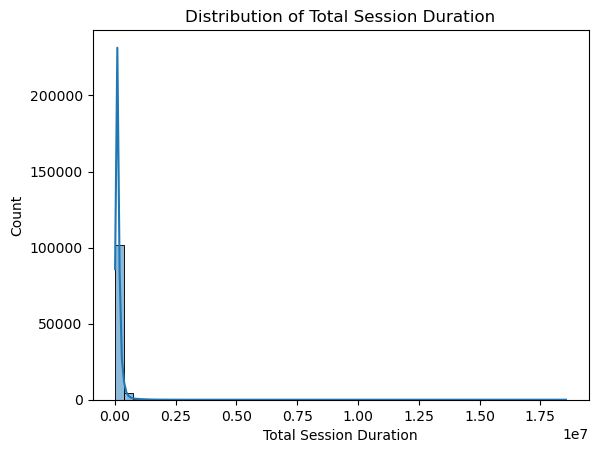

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(aggregated_data['total_session_duration_sec'], bins=50, kde=True)
plt.title('Distribution of Total Session Duration')
plt.xlabel('Total Session Duration')
plt.show()

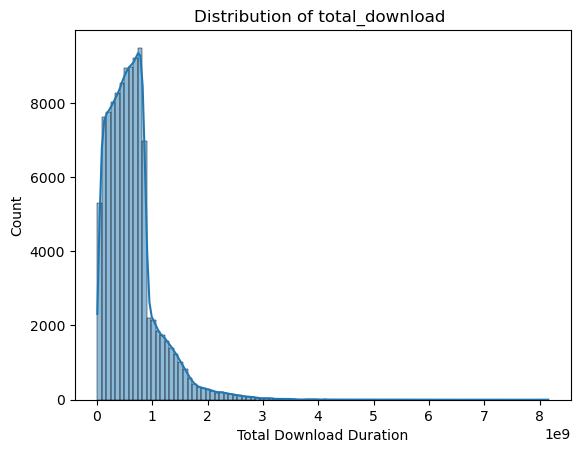

In [47]:
sns.histplot(aggregated_data['total_download'], bins=100, kde=True)
plt.title('Distribution of total_download ')
plt.xlabel('Total Download Duration')
plt.show()

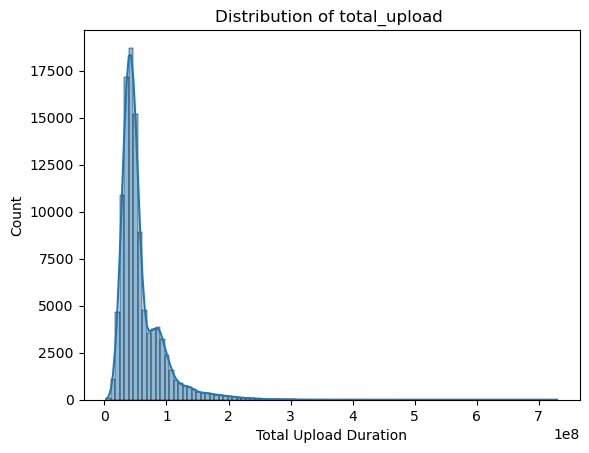

In [46]:
sns.histplot(aggregated_data['total_upload'], bins=100, kde=True)
plt.title('Distribution of total_upload ')
plt.xlabel('Total Upload Duration')
plt.show()

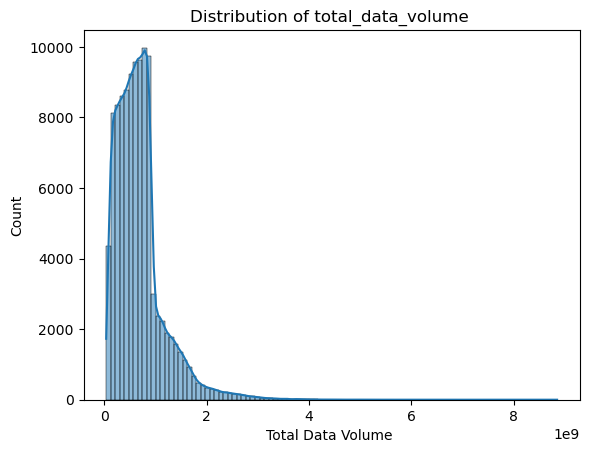

In [36]:
sns.histplot(aggregated_data['total_data_volume'], bins=100, kde=True)
plt.title('Distribution of total_data_volume ')
plt.xlabel('Total Data Volume ')
plt.show()

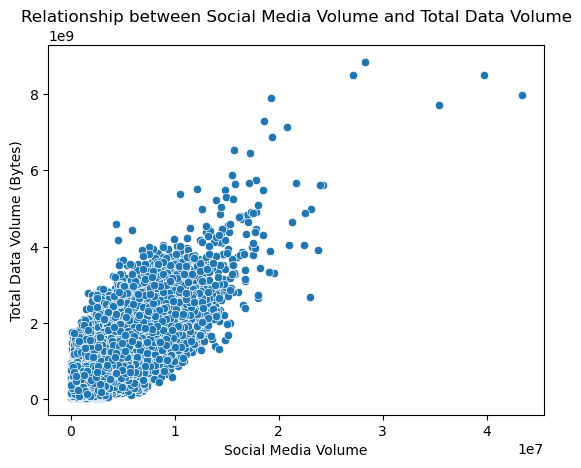

Correlation between Social Media Volume and Total Data Volume: 0.62


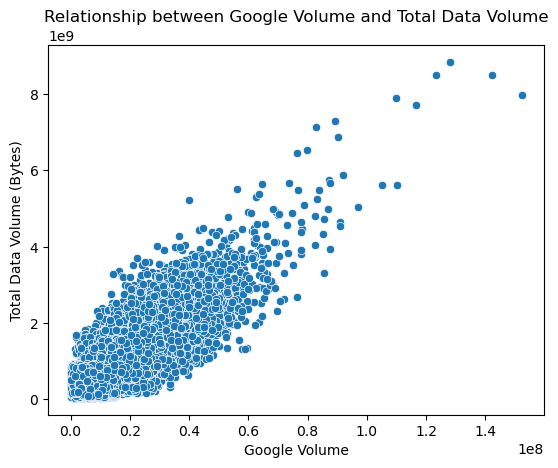

Correlation between Google Volume and Total Data Volume: 0.68


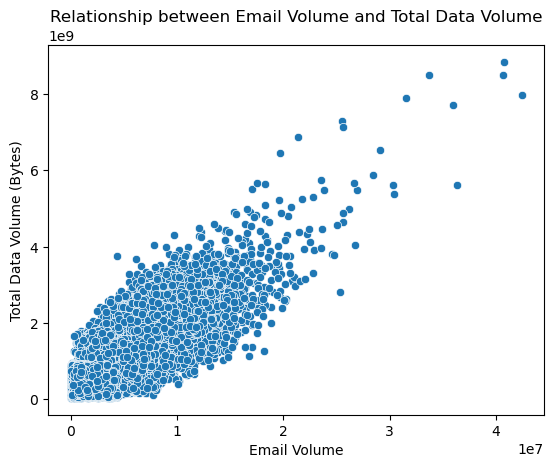

Correlation between Email Volume and Total Data Volume: 0.66


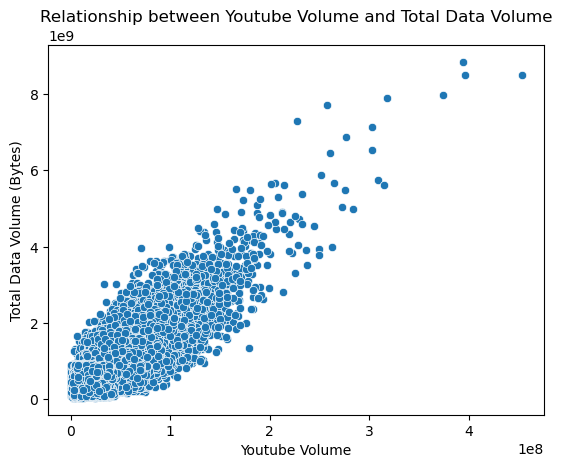

Correlation between Youtube Volume and Total Data Volume: 0.71


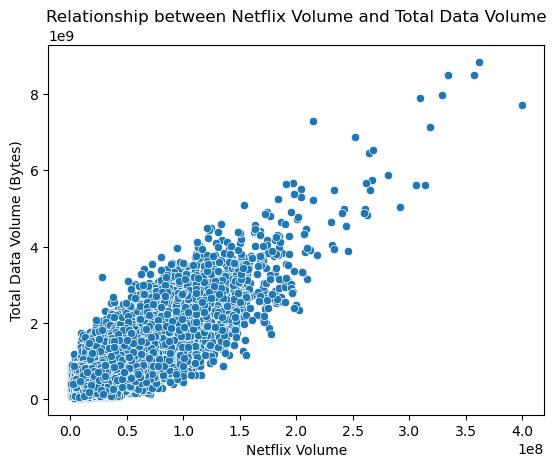

Correlation between Netflix Volume and Total Data Volume: 0.71


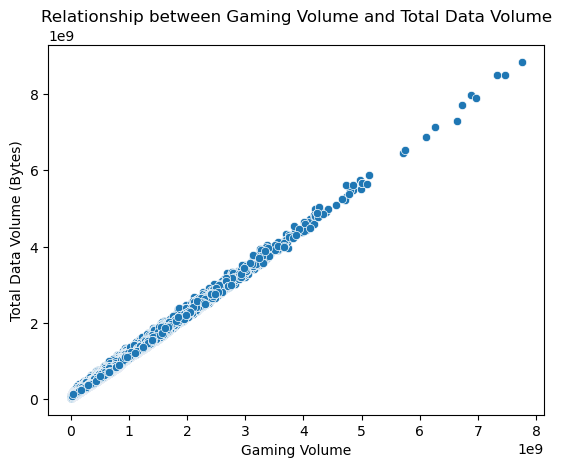

Correlation between Gaming Volume and Total Data Volume: 1.00


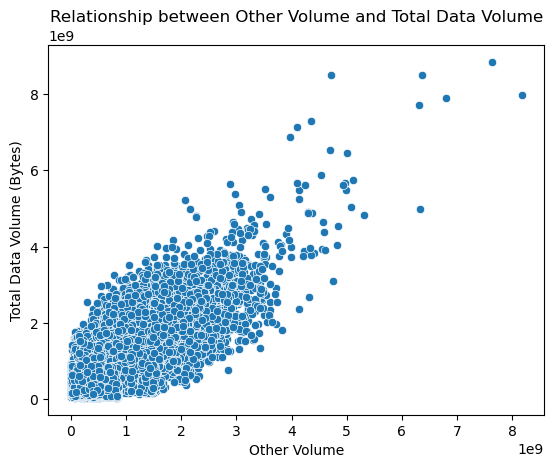

Correlation between Other Volume and Total Data Volume: 0.62


In [37]:
applications = [
    'social_media_volume', 'google_volume', 'email_volume',
    'youtube_volume', 'netflix_volume', 'gaming_volume', 'other_volume'
]

for app in applications:
    sns.scatterplot(x=aggregated_data[app], y=aggregated_data['total_data_volume'])
    plt.title(f'Relationship between {app.replace("_", " ").title()} and Total Data Volume')
    plt.xlabel(app.replace("_", " ").title())
    plt.ylabel('Total Data Volume (Bytes)')
    plt.show()

    correlation = aggregated_data[app].corr(aggregated_data['total_data_volume'])
    print(f'Correlation between {app.replace("_", " ").title()} and Total Data Volume: {correlation:.2f}')

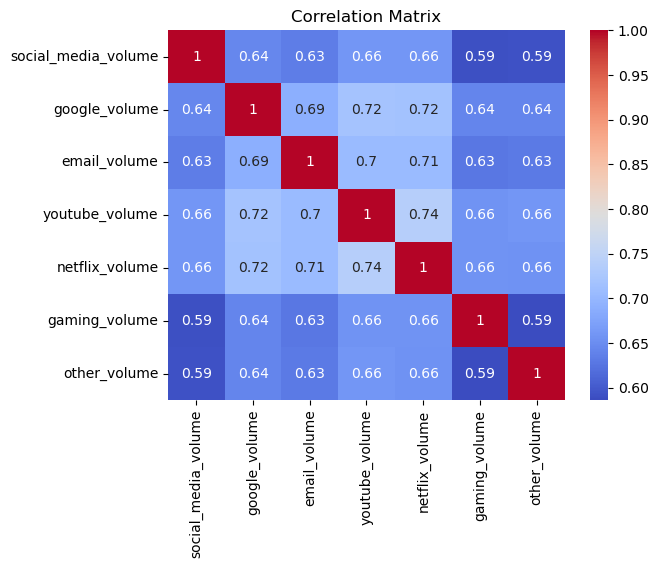

In [38]:
data = aggregated_data[['social_media_volume', 'google_volume', 'email_volume','youtube_volume', 'netflix_volume','gaming_volume',  'other_volume' ]]             
correlation_matrix = data.corr()           
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
             

- decile

In [29]:
aggregated_data['decile'] = pd.qcut(aggregated_data['total_session_duration_sec'], 10, labels=False)

decile_data = aggregated_data.groupby('decile').agg(
    total_DL_UL=('total_data_volume', 'sum')
).reset_index()


# Filter for top five deciles
top_deciles = aggregated_data[aggregated_data['decile'] >= 5]

# Compute total data volume per decile class
decile_data = top_deciles.groupby('decile').agg(
    total_DL_UL=('total_data_volume', 'sum')
).reset_index()


print(decile_data)

   decile   total_DL_UL
0       5  6.426251e+12
1       6  6.152478e+12
2       7  7.822234e+12
3       8  9.305495e+12
4       9  1.486393e+13


### Plotting 